## Загружаем библиотеки

In [1]:
import os
import sys
import logging
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler

sys.path.append(os.path.dirname(os.path.abspath("../src/preprocessing.py")))

logging.basicConfig(filename='../logs/logs_file.log', level=logging.DEBUG, 
                    format='%(asctime)s %(levelname)-8s %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S')

logging.getLogger("matplotlib").setLevel(logging.WARNING)

import preprocessing
from pandas_profiling import ProfileReport

logging.debug('Успешный импорт библиотек')

#### Вспомогательные переменные

In [2]:
color=sns.color_palette()
data_path = "../data/heart.csv"
report_dir = "../reports/"

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

logging.debug('Успешное объявление вспомогательных переменных')

## Загружаем данные

#### Описание данных
* **age**: The person's age in years
* **sex**: The person's sex (1 = male, 0 = female)
* **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* **trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)
* **chol**: The person's cholesterol measurement in mg/dl
* **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* **thalach**: The person's maximum heart rate achieved
* **exang**: Exercise induced angina (1 = yes; 0 = no)
* **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* **ca**: The number of major vessels (0-3)
* **thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* **target**: Heart disease (0 = no, 1 = yes)

In [3]:
data = pd.read_csv(data_path)
print(data.shape)
data.head()

(303, 14)


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [6]:
# Удаляем дубликаты
print("До удаления", data.shape)
data = data.drop_duplicates()
print("После удаления", data.shape)

logging.debug('Удаляем дубликаты')

До удаления (303, 14)
После удаления (302, 14)


## EDA

In [7]:
# Создадим обзорный отчет и сохраним его в папке с отчетами
profile = ProfileReport(data, title='Отчет', explorative=True)
profile.to_file(report_dir+"Отчет по факторам.html");

logging.debug('Создаем отчет Pandas Profile')

In [8]:
profile

In [9]:
logging.debug('Начинаем анализ для отчета')

#### Целевая переменная

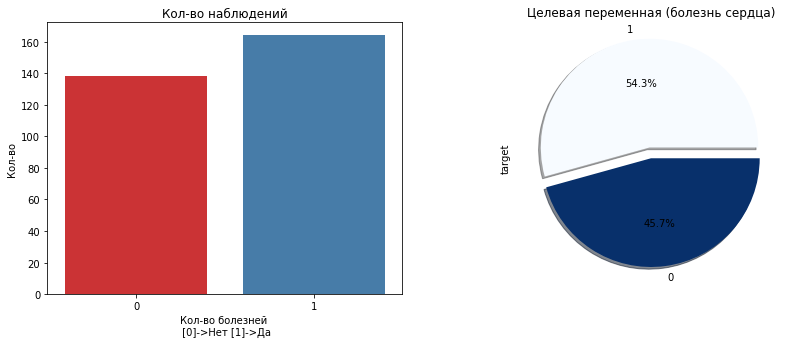

In [10]:
fig, ax=plt.subplots(1, 2, figsize = (14,5))
sns.countplot(data=data, x='target', ax=ax[0], palette='Set1')
ax[0].set_xlabel("Кол-во болезней \n [0]->Нет [1]->Да")
ax[0].set_ylabel("Кол-во")
ax[0].set_title("Кол-во наблюдений")
data['target'].value_counts().plot.pie(explode=[0.1,0.0], autopct='%1.1f%%', ax=ax[1], shadow=True, cmap='Blues')
plt.title("Целевая переменная (болезнь сердца)");

#### Категориальные фичи

#### Пол

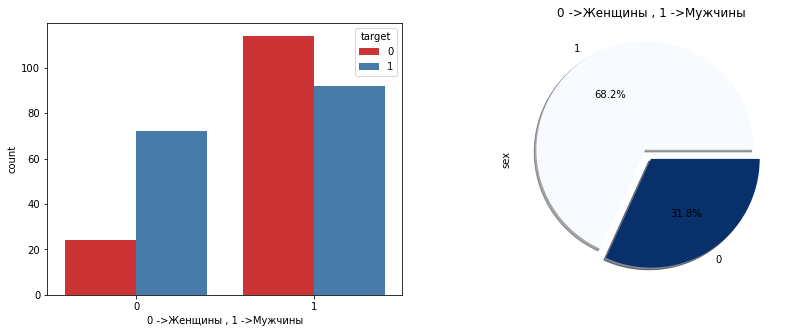

In [11]:
fig, ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='sex',data=data, hue='target', palette='Set1', ax=ax[0])
ax[0].set_xlabel("0 ->Женщины , 1 ->Мужчины")
data.sex.value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', shadow=True, explode=[0.1,0], cmap='Blues')
ax[1].set_title("0 ->Женщины , 1 ->Мужчины");

#### Сахар в крови

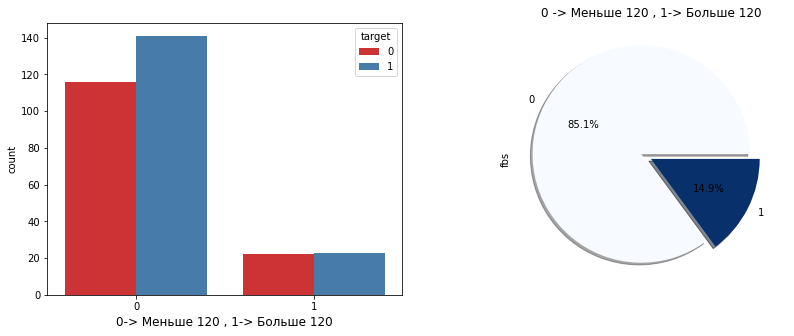

In [12]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='fbs',data=data,hue='target',palette='Set1', ax=ax[0])
ax[0].set_xlabel("0-> Меньше 120 , 1-> Больше 120", size=12)
data.fbs.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0], cmap='Blues')
ax[1].set_title("0 -> Меньше 120 , 1-> Больше 120", size=12);

#### Электрокардиограмма в покое

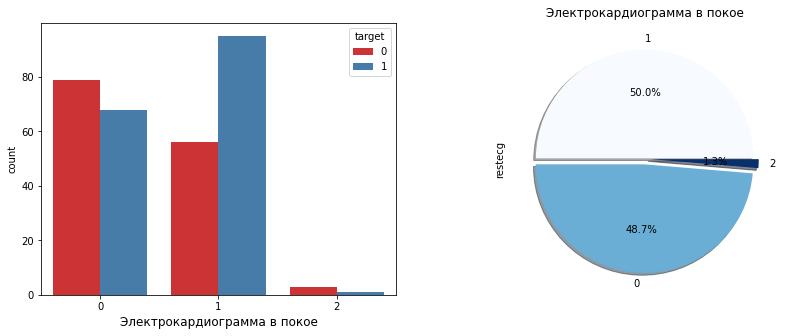

In [13]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='restecg', data=data, hue='target', palette='Set1', ax=ax[0])
ax[0].set_xlabel("Электрокардиограмма в покое",size=12)
data.restecg.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.005,0.05,0.05],cmap='Blues')
ax[1].set_title("Электрокардиограмма в покое",size=12);

#### Пик нагрузки ST сегмент

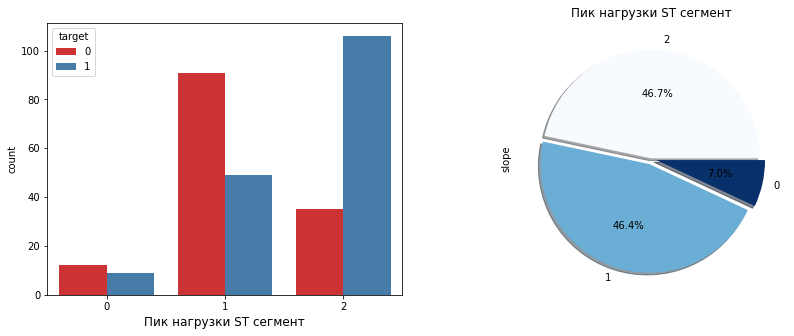

In [14]:
fig,ax=plt.subplots(1, 2, figsize=(14,5))
sns.countplot(x='slope', data=data, hue='target', palette='Set1', ax=ax[0])
ax[0].set_xlabel("Пик нагрузки ST сегмент", size=12)
data.slope.value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', shadow=True, explode=[0.005,0.05,0.05], cmap='Blues')

ax[1].set_title("Пик нагрузки ST сегмент", size=12);

#### Количество крупных судов

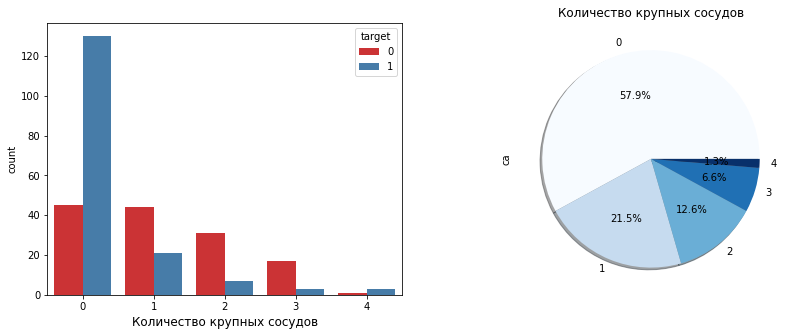

In [15]:
fig,ax=plt.subplots(1, 2, figsize=(14,5))
sns.countplot(x='ca', data=data, hue='target', palette='Set1', ax=ax[0])
ax[0].set_xlabel("Количество крупных сосудов", size=12)
data.ca.value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', shadow=True, cmap='Blues')
ax[1].set_title("Количество крупных сосудов", size=12);

#### Грудная боль

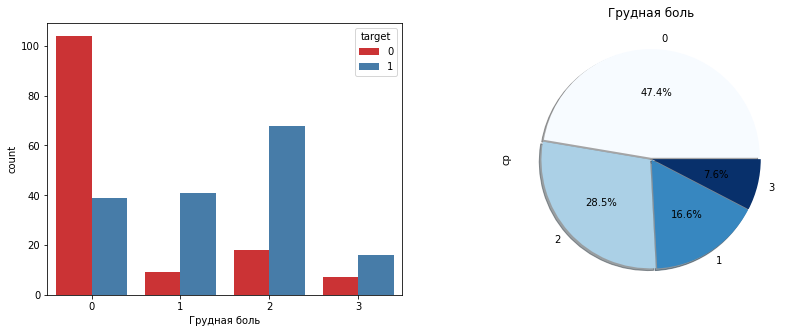

In [16]:
fig,ax=plt.subplots(1, 2, figsize=(14,5))
sns.countplot(x='cp', data=data, hue='target', palette='Set1', ax=ax[0])
ax[0].set_xlabel("Грудная боль")
data.cp.value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', explode=[0.01,0.01,0.01,0.01], shadow=True, cmap='Blues')
ax[1].set_title("Грудная боль");

####  Непрерывные фичи

#### Артериальное давление человека в состоянии покоя

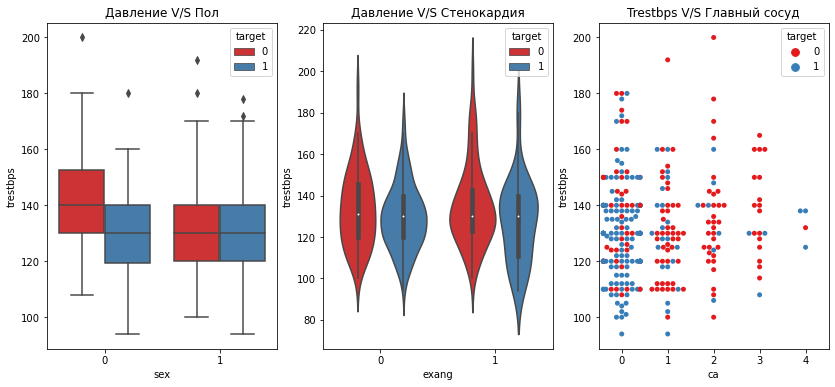

In [17]:
fig,ax=plt.subplots(1, 3, figsize=(14,6))
sns.boxplot(y='trestbps', data=data, x='sex', hue='target', palette='Set1', ax=ax[0])
ax[0].set_title("Давление V/S Пол")
sns.violinplot(y='trestbps', data=data, x='exang', hue='target', ax=ax[1], palette='Set1')
ax[1].set_title("Давление V/S Стенокардия")
sns.swarmplot(y='trestbps', data=data, x='ca', hue='target', ax=ax[2], palette='Set1')
ax[2].set_title("Trestbps V/S Главный сосуд");

#### Уровень Холестерина

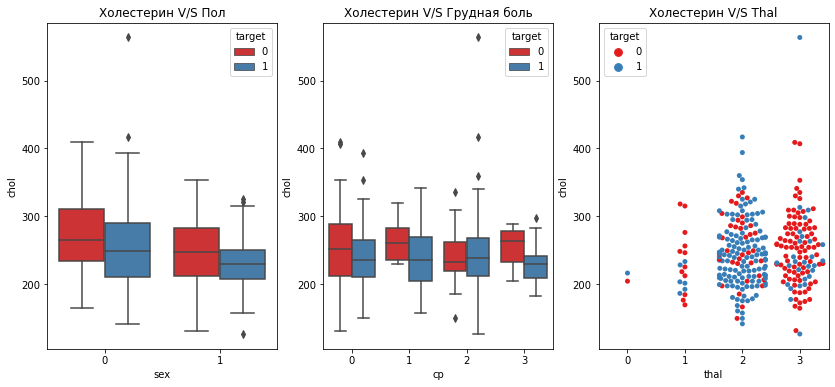

In [18]:
fig,ax=plt.subplots(1, 3, figsize=(14,6))
sns.boxplot(y='chol', data=data, x='sex', hue='target', palette='Set1', ax=ax[0])
ax[0].set_title("Холестерин V/S Пол")
sns.boxplot(y='chol', data=data, x='cp', hue='target', ax=ax[1], palette='Set1')
ax[1].set_title("Холестерин V/S Грудная боль")
sns.swarmplot(y='chol', data=data, x='thal', hue='target', ax=ax[2], palette='Set1')
ax[2].set_title("Холестерин V/S Thal");

#### Депрессия ST, вызванная упражнениями по сравнению с отдыхом

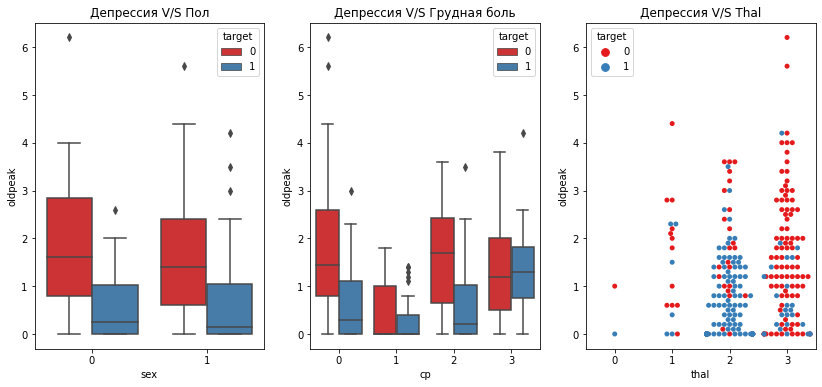

In [19]:
fig,ax=plt.subplots(1, 3, figsize=(14,6))
sns.boxplot(y='oldpeak', data=data, x='sex', hue='target', palette='Set1',ax=ax[0])
ax[0].set_title("Депрессия V/S Пол")
sns.boxplot(y='oldpeak', data=data, x='cp', hue='target', ax=ax[1], palette='Set1')
ax[1].set_title("Депрессия V/S Грудная боль")
sns.swarmplot(y='oldpeak', data=data, x='thal',hue='target', ax=ax[2], palette='Set1')
ax[2].set_title("Депрессия V/S Thal");

#### Распределение фичей

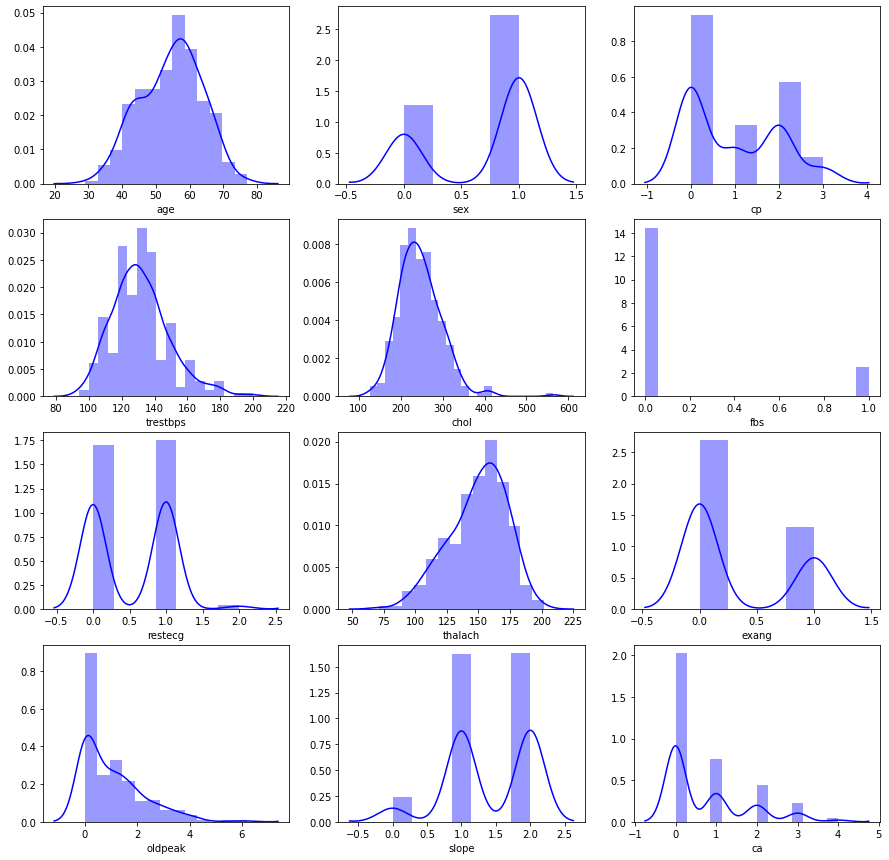

In [20]:
fig,ax=plt.subplots(4,3,figsize=(15,15))
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.distplot(data.iloc[:,i], kde=True, color='blue')

#### Корреляционная матрица

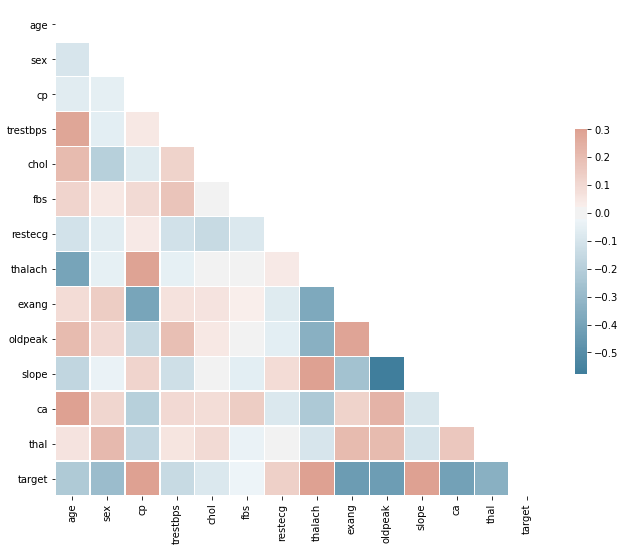

In [21]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

#### Сохраним отчет в виде HTML ноубука 

In [22]:
!jupyter nbconvert --to html EDA.ipynb

[NbConvertApp] Converting notebook EDA.ipynb to html
[NbConvertApp] Writing 4779677 bytes to EDA.html


In [23]:
! mv EDA.html ../reports/  

In [24]:
logging.debug('Заканчиваем отчет и сохраняем в формате html')

## Препроцессинг и подготовка данных для моделирования

In [25]:
print("Размер до предобработки: ", data.shape)
data = preprocessing.preprocessing(data)
print("Размер после предобработки: ", data.shape)

Размер до предобработки:  (302, 14)
---------------------------------
Конвертация категориальных факторов - начало
Конвертация категориальных факторов - конец
---------------------------------
Создание dummy факторов на оснвое категориальных фич - начало
Создание dummy факторов на оснвое категориальных фич - конец
До корреляционного анализа: (302, 23)
После корреляционного анализа: (302, 23)
---------------------------------
Нормализация данных - начало
Нормализация данных - конец
---------------------------------
Размер после предобработки:  (302, 23)


### Разбиваем выборку на Обучение и Тест